In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

/Users/hechengwang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def img_bw_data(imgpath):
    # type: (object) -> object
    img = Image.open(imgpath)
    img_bw = img.convert('L')
    pixels_array = np.where(np.asarray(img_bw) > 255/2, 0, 1)
    return pixels_array

In [3]:
imgpath = '/Users/hechengwang/Downloads/Files/0a0a5dc8-b613-47cd-a2ca-a4d001159541.png'
datapath = '/Users/hechengwang/Downloads/Files/listOfFields.csv'

In [4]:
img0 = img_bw_data(imgpath)

In [5]:
img0

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
image_height, image_width = img0.shape

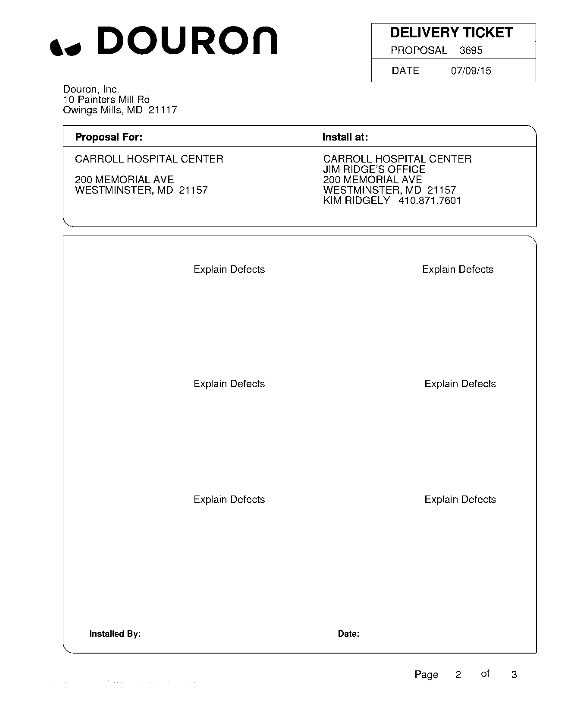

In [22]:
# display image
def display(img):
    plt.figure(figsize = np.multiply(img.shape, 0.01))
    plt.axis('off')
    plt.imshow(img, cmap=cm.binary)

# output image
display(img0)

In [8]:
data = pd.read_csv(datapath)

In [9]:
data.head()

,ImagePath,X,Y,W,H,PageNumber
0,Files/1cb80003-7a64-48bf-9083-a32200ce6d09.png,1675,648,45,45,1
1,Files/1cb80003-7a64-48bf-9083-a32200ce6d09.png,1512,280,45,45,1
2,Files/1cb80003-7a64-48bf-9083-a32200ce6d09.png,1607,747,45,45,1
3,Files/1cb80003-7a64-48bf-9083-a32200ce6d09.png,1560,508,45,45,1
4,Files/1cb80003-7a64-48bf-9083-a32200ce6d09.png,1560,202,47,47,1


In [10]:
data['full_imgpath'] = '/Users/hechengwang/Downloads/' + data['ImagePath']

In [18]:
img_dict = {}

for index, row in data[:200].iterrows():
    filepath = row['full_imgpath'].split('/')[-1]
    if not filepath in img_dict:
        img = img_bw_data(row['full_imgpath'])
        img_dict[filepath] = [img, np.zeros(img.shape)]
        x, y, x1, y1 = row['X'], row['Y'], row['X'] + row['W'], row['Y'] + row['H']
        img_dict[filepath][-1][y:y1, x:x1] = np.ones((y1 - y, x1 - x))
    else:
        x, y, x1, y1 = row['X'], row['Y'], row['X'] + row['W'], row['Y'] + row['H']
        img_dict[filepath][-1][y:y1, x:x1] = np.ones((y1 - y, x1 - x))

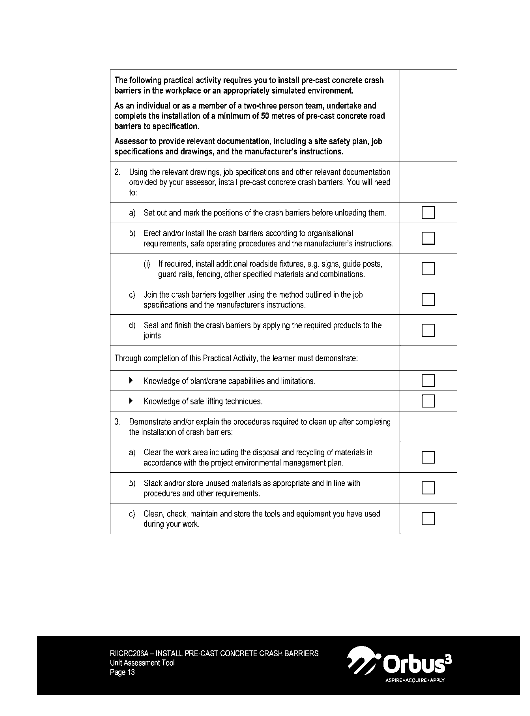

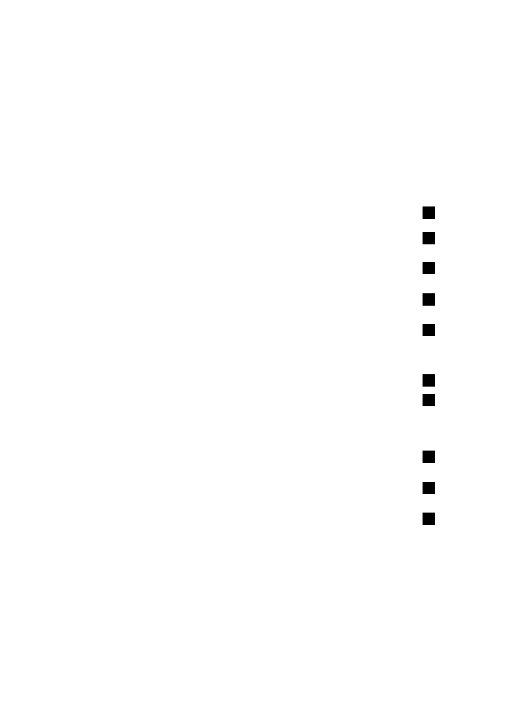

In [23]:
display(img_dict['0d90c176-0009-4c1a-81d2-a33100225f33.png'][0])
display(img_dict['0d90c176-0009-4c1a-81d2-a33100225f33.png'][1])

In [21]:
img_dict

{'0d90c176-0009-4c1a-81d2-a33100225f33.png': [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ..., 
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]]), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]])],
 '13b1cad9-e45a-4160-9649-a334013e9a65.png': [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ..., 
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ..

In [39]:
a = pd.DataFrame(img_dict['e1d7d9b3-ade8-40fb-b6ec-a2ee00091f9d.png'][0].flatten()).T
b = pd.DataFrame(img_dict['0d90c176-0009-4c1a-81d2-a33100225f33.png'][1].flatten()).T

In [40]:
a.append(b)

,0,1,2,3,4,5,6,7,8,9,...,2119958,2119959,2119960,2119961,2119962,2119963,2119964,2119965,2119966,2119967
0,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
len(a.columns)

1938816

In [45]:
len(b.columns)